In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Fraud.csv')

In [3]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


## Key Factors that predict fraudulent customers
1). Transaction type: Certain types (e.g., TRANSFER, CASH_OUT) correlate with fraudulent behavior.
2). Amount: Suspiciously high amounts might indicate fraud.
3). Old and New Balances: If there’s a discrepancy between the original balance and the new balance (e.g., transferring all money out), this could 
    indicate fraud.
4). Destination Account: Unusual transactions into or out of accounts with low balances could be red flags.

"step" and "name" columns does not correlate with target column "isFraud" and so they do not contribute in prediction process.
So drop "step", "nameOrig", "nameDest" and "isFlaggedFraud' columns from the dataset 

In [4]:
df.drop(columns=['isFlaggedFraud'],axis=1, inplace=True)
df.drop(columns=['nameOrig'],axis=1, inplace=True)
df.drop(columns=['nameDest'],axis=1, inplace=True)
df.drop(columns=['step'],axis=1, inplace=True)

In [5]:
df

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0
1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0
2,TRANSFER,181.00,181.00,0.00,0.00,0.00,1
3,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1
4,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0
...,...,...,...,...,...,...,...
6362615,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,1
6362616,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,1
6362617,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,1
6362618,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,1


## 1. Checking for Missing Values

In [6]:
df.isnull().sum()

type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

##
As we can see there are no missing values in our data

## 2. Checking for outliers

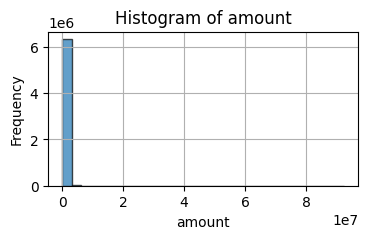

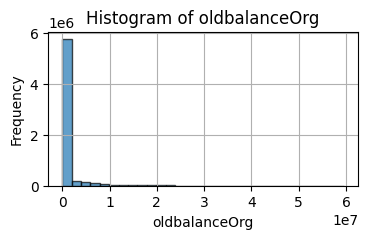

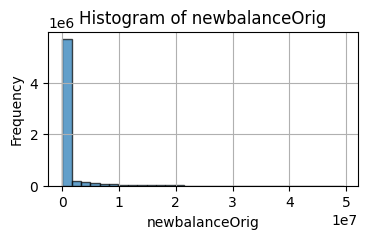

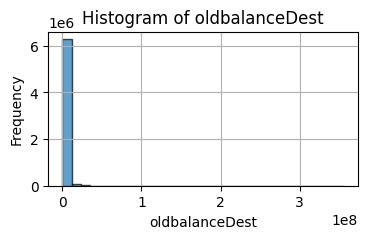

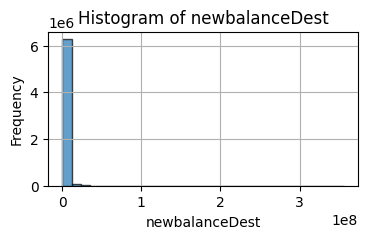

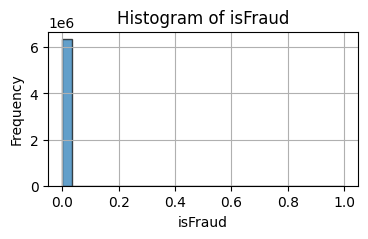

In [7]:
## Plotting Histogram Plot for each column to check that if data is normally distributed or not

import matplotlib.pyplot as plt

# Exclude the 'type' column
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Plot histogram for each numeric column
for column in numeric_columns:
    plt.figure(figsize=(4, 2))
    plt.hist(df[column], bins=30, edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


##
As we can see all the columns are left skewed and not normally distributed. So there are outliers present in each and every column of data

In [8]:
## Finding the 25th percentile and 75th percentile for outliers detection

df.describe()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03
std,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00
75%,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00
max,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00


In [9]:
## we have considered a data point to be an outlier if it goes below 25th percentile and above 75th percentile. And then we find the total number of outliers present in each column using InterQuartile Range method.


# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for numeric columns
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define outliers as values below Q1 or above Q3
outliers_below = (numeric_df < Q1)
outliers_above = (numeric_df > Q3)

# Total number of outliers (values below Q1 or above Q3)
total_outliers = (outliers_below | outliers_above).sum()

# Print total outliers for each numeric column
print("Total number of outliers per numeric column:")
print(total_outliers)

# If you want to get the overall total number of outliers across the whole dataset
overall_total_outliers = total_outliers.sum()
print(f"\nOverall total number of outliers: {overall_total_outliers}")


Total number of outliers per numeric column:
amount            3181308
oldbalanceOrg     1590655
newbalanceOrig    1590654
oldbalanceDest    1590655
newbalanceDest    1590655
isFraud              8213
dtype: int64

Overall total number of outliers: 9552140


##
As you can see the total number of outliers in amount column is 3181308 out of 6362620, which is almost half. If we remove these outliers then almost 50 percent data will be changed and will not be much representable for fraud detection case. There is a reason that here outliers must be kept as they are important because Fraud case contains data point which does not lie between the 25th percentile range and 75th percentile range which is an outlier and necessary in training the model. So we won't remove outliers in this fraud prediction case

## 3. Checking for Multicolinearity
Multicolinearity is a statistical phenomenon that occurs when two or more independent variables (here, step	"amount",	"oldbalanceOrg",	"newbalanceOrig",	"oldbalanceDest",	"newbalanceDest") in a multiple regression models are highly correlated. In other words, these variables exhibit strong relationship, making it difficult to isolate the individual effects of each variable on the dependent variable.

Multicolinearity is not bad when we do prediction task using machine learning algorithm as here in this case where we do fraud prediction. So we won't do anything to remove multicolineairty here in this case

In [10]:
## FInding the categories for "type" column
df['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

## Model Description
In our model we create pipelines to to automate and streamline the end-to-end process of data preprocessing, model training, and evaluation. This ensures that each step is executed in the correct order and reduces the risk of manual errors.
In pipelines we use column transformers Instead of manually splitting the dataset and applying preprocessing steps separately, So the ColumnTransformer automates this process. It applies the specified transformations to the appropriate columns, streamlining the workflow.

As a first step, we create column transformer 1 - which includes OneHotEncoding for the string or non numerical or nominal categorical column that is "type" which contains 4 categories "CASH_OUT", "PAYMENT", "CASH_IN", "TRANSFER", and "DEBIT".

AS a second step, we create column transformer for model selection which we are using RandomForestClassifier

As a third step, we create Pipeline by combining Column Transformer 1 "trf1" and column transformer 2 "trf2" and then pipeline is applied on training data to train the model and then prediction on testing data.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [12]:
from sklearn.preprocessing import OneHotEncoder
trf1 = ColumnTransformer([
    ('ohe_type', OneHotEncoder(sparse=False, handle_unknown='ignore'),[0])
], remainder='passthrough')

In [13]:
## Train the model
trf2 = RandomForestClassifier()

In [14]:
pipe = Pipeline([
    ('trf1', trf1),
    ('trf2', trf2),
])

In [15]:
##Split the data
X = df.drop(columns=['isFraud'])
y = df['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
## Train or fit the model on X_train and y_train with "pipe" algorithm
pipe.fit(X_train, y_train)

C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_type',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [0])])),
                ('trf2', RandomForestClassifier())])

In [17]:
## Predict "y" on test data and save it as "y_pred" and compare it with "y_test" to get an accuracy.
y_pred = pipe.predict(X_test)

In [18]:
accuracy_score(y_test, y_pred)

0.9996982375185065

In [19]:
import pickle
pickle.dump(pipe, open('fraud.pkl', 'wb'))

## We have saved pipeline as fraud.pkl which can be applied to any new data for prediction

In [20]:
## Now predicting for new data
## First we import the fraud.pkl pipeline to apply on new data
pipe = pickle.load(open('fraud.pkl', 'rb'))

In [25]:
## Creating any random test input ignoring "step", "nameOrig", "nameDest" and "isFlaggedFraud" columns
## Here is the new input data
test_input = np.array(['CASH_OUT', 181.00,	181.00,	0.00,	21182.00,	0.00], dtype=object).reshape(1,6)

In [26]:
pd.DataFrame(test_input)

,0,1,2,3,4,5
0,CASH_OUT,181.0,181.0,0.0,21182.0,0.0


In [27]:
## Predicting
pd.DataFrame(pipe.predict(test_input))

C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


,0
0,1


## So for test_input data, the prediction is "1" which indicates that it is a fraud
Accuracy of our model is - 99.96%

## Prevention Strategies
1. Real-time monitoring: Implement machine learning models for real-time fraud detection, flagging unusual transactions.
2. Multi-factor authentication: Especially for large transactions.
3. Limiting transaction sizes: Imposing caps on daily transactions for certain account types.
4. User profiling: Developing behavior profiles for customers to detect anomalies.

## Measuring Effectiveness
After implementing fraud prevention strategies:
1. Monitor the false-positive rate and false-negative rate to see if fraud detection improves.
2. Perform A/B testing: Apply the new system to a subset of transactions and compare its performance against the old system.
3. Analyze customer feedback: Ensure legitimate users are not being falsely flagged as fraudulent.
4. Track changes in fraud rates over time.